# 1. Useful imports

In [26]:
#importing library like pandas numpy for data manipulations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   # for visualizing missing values
import plotly.express as px
import plotly.graph_objects as go # for geo_location visulaizations

# 2. Gathering data

In [17]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [18]:
df = pd.read_csv("C:\\Users\\91775\EXCEL FILES\\country_vaccinations.csv")
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Albania      ALB  10-01-2021                 0.0                0.0   
1  Albania      ALB  11-01-2021                 NaN                NaN   
2  Albania      ALB  12-01-2021               128.0              128.0   
3  Albania      ALB  13-01-2021               188.0              188.0   
4  Albania      ALB  14-01-2021               266.0              266.0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN                64.0   
2                      NaN                     NaN                64.0   
3                      NaN                    60.0                63.0   
4                      NaN                    78.0                66.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.00                           0.00   
1                             NaN                            NaN   
2                            0.00                           0.00   
3                            0.01                           0.01   
4                            0.01                           0.01   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            22.0   
2                                  NaN                            22.0   
3                                  NaN                            22.0   
4                                  NaN                            23.0   

          vaccines         source_name  \
0  Pfizer/BioNTech  Ministry of Health   
1  Pfizer/BioNTech  Ministry of Health   
2  Pfizer/BioNTech  Ministry of Health   
3  Pfizer/BioNTech  Ministry of Health   
4  Pfizer/BioNTech  Ministry of Health   

                                      source_website  
0  https://shendetesia.gov.al/vaksinimi-anticovid...  
1  https://shendetesia.gov.al/vaksinimi-anticovid...  
2  https://shendetesia.gov.al/vaksinimi-anticovid...  
3  https://shendetesia.gov.al/vaksinimi-anticovid...  
4  https://shendetesia.gov.al/vaksinimi-anticovid...

# 3. Basic info of data

In [19]:
print("shape of data:-", df.shape)

shape of data:- (3081, 15)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3081 non-null   object 
 1   iso_code                             2833 non-null   object 
 2   date                                 3081 non-null   object 
 3   total_vaccinations                   1980 non-null   float64
 4   people_vaccinated                    1643 non-null   float64
 5   people_fully_vaccinated              1016 non-null   float64
 6   daily_vaccinations_raw               1642 non-null   float64
 7   daily_vaccinations                   2960 non-null   float64
 8   total_vaccinations_per_hundred       1980 non-null   float64
 9   people_vaccinated_per_hundred        1643 non-null   float64
 10  people_fully_vaccinated_per_hundred  1016 non-null   float64
 11  daily_vaccinations_per_million

1. From this we can see that there are lot of missing values. 
2. Six column are categorical type while nine coloumn are numerical type.

<AxesSubplot:>

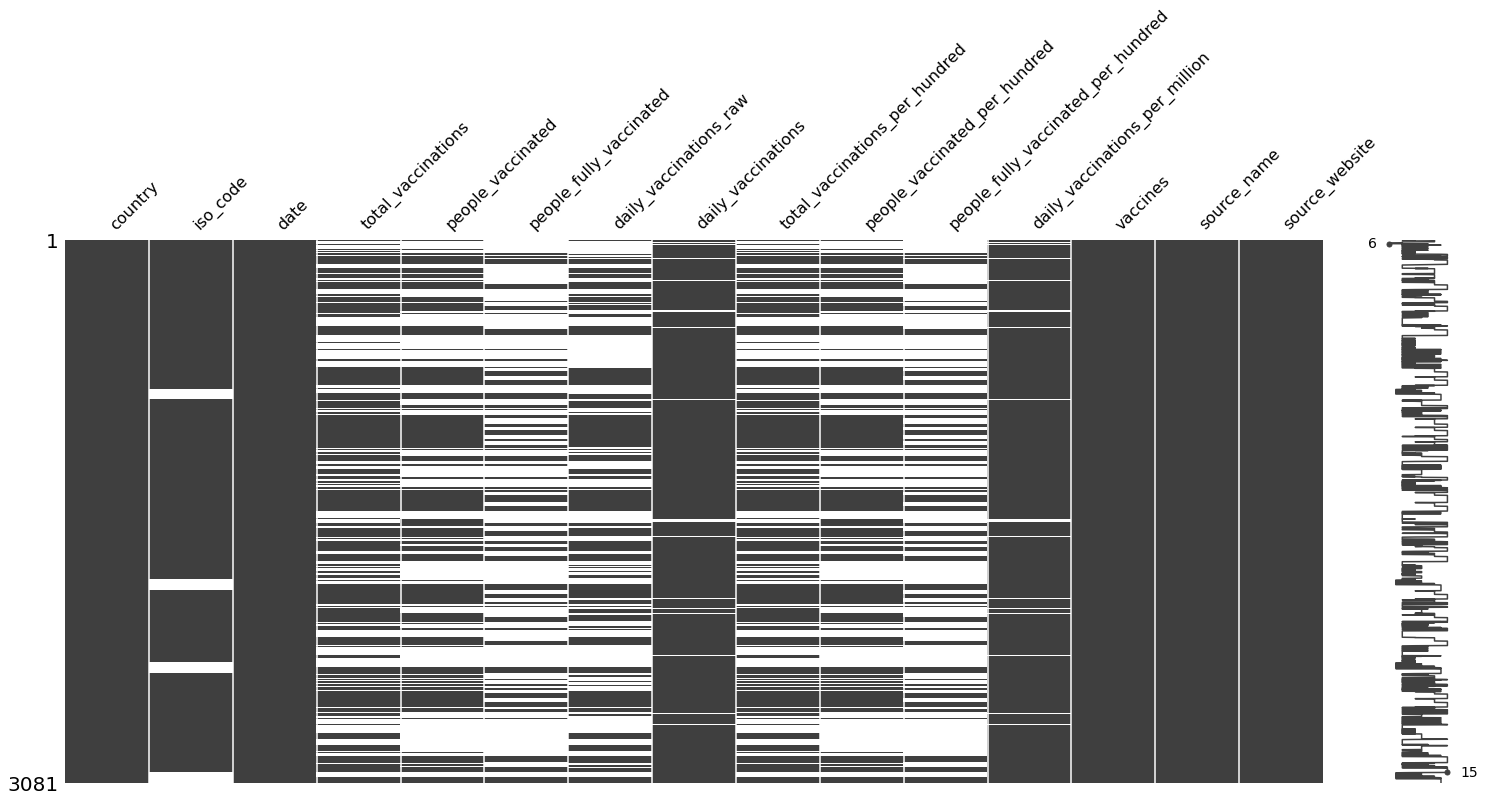

In [21]:
#creating heatmap to  visualise null values
msno.matrix(df)

In [22]:
df.isnull().sum()

country                                   0
iso_code                                248
date                                      0
total_vaccinations                     1101
people_vaccinated                      1438
people_fully_vaccinated                2065
daily_vaccinations_raw                 1439
daily_vaccinations                      121
total_vaccinations_per_hundred         1101
people_vaccinated_per_hundred          1438
people_fully_vaccinated_per_hundred    2065
daily_vaccinations_per_million          121
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

# 4. Data preprocessing

In [23]:
for i in df.columns:
    if df[i].isnull().sum() > (0.5 *3081):
        df.drop(i,axis=1,inplace=True)
print('Left columns are :-',df.shape)
print(df.isnull().sum())

Left columns are :- (3081, 13)
country                              0
iso_code                           248
date                                 0
total_vaccinations                1101
people_vaccinated                 1438
daily_vaccinations_raw            1439
daily_vaccinations                 121
total_vaccinations_per_hundred    1101
people_vaccinated_per_hundred     1438
daily_vaccinations_per_million     121
vaccines                             0
source_name                          0
source_website                       0
dtype: int64


Text(0.5, 1.0, 'Correlation Between different Features')

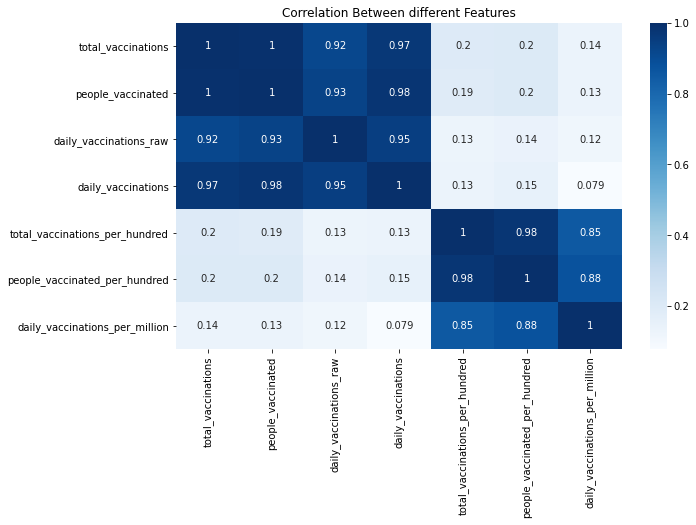

In [24]:
#lets check about correlation in our data
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.title('Correlation Between different Features')

c:\users\91775\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91775\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91775\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

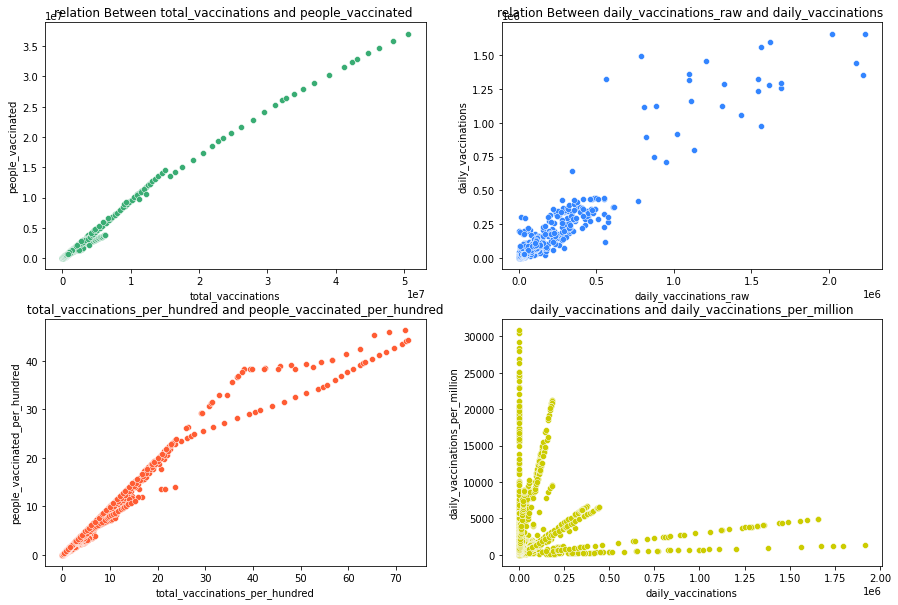

In [25]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
#fig 1
sns.scatterplot(df['total_vaccinations'], df['people_vaccinated'],ax=ax[0][0],color='#39ac73')
ax[0,0].set_title('relation Between total_vaccinations and people_vaccinated ')
#fig 2
sns.scatterplot(df['daily_vaccinations_raw'], df['daily_vaccinations'], color='#3385ff',ax=ax[0][1])
ax[0][1].set_title('relation Between daily_vaccinations_raw and daily_vaccinations ')
#fig 3
sns.scatterplot(df['total_vaccinations_per_hundred'], df['people_vaccinated_per_hundred'], color='#ff5c33',ax=ax[1][0])
ax[1][0].set_title(' total_vaccinations_per_hundred and people_vaccinated_per_hundred ')
#fig 4
sns.scatterplot( df['daily_vaccinations'],df['daily_vaccinations_per_million'], color='#cccc00',ax=ax[1][1])
ax[1][1].set_title(' daily_vaccinations and daily_vaccinations_per_million ')
plt.show()

# 5. Dealing with missing values

In [27]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'vaccines', 'source_name',
       'source_website'],
      dtype='object')

In [28]:
#we will drop all the columns which are highly correlated and retain only one of them
df.drop(columns=['people_vaccinated','daily_vaccinations_raw','daily_vaccinations_raw'],inplace=True)

In [29]:
#allright we are now only left with some useful values
print(df.shape)
df.isnull().sum()

(3081, 11)


country                              0
iso_code                           248
date                                 0
total_vaccinations                1101
daily_vaccinations                 121
total_vaccinations_per_hundred    1101
people_vaccinated_per_hundred     1438
daily_vaccinations_per_million     121
vaccines                             0
source_name                          0
source_website                       0
dtype: int64

# 6. Data Analysis

<AxesSubplot:title={'center':'Total No of Vaccination done By country'}, xlabel='country', ylabel='total_vaccinations'>

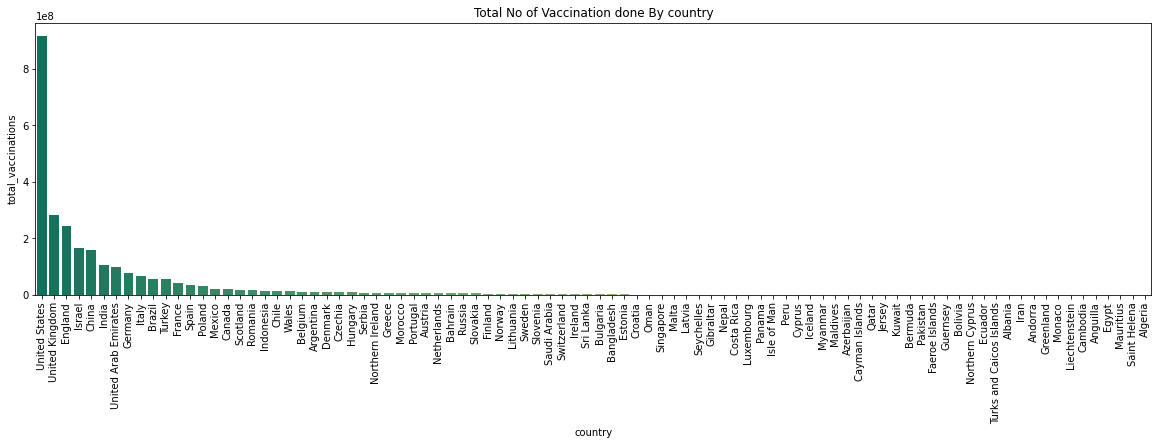

In [36]:
# now lets perform some data Analysis
sum_df=df.groupby('country').sum().sort_values(by='total_vaccinations',ascending=False)
fig,ax=plt.subplots(figsize=(20,5))
plt.title('Total No of Vaccination done By country')
plt.xticks(rotation=90)
sns.barplot(x=sum_df.index,y=sum_df['total_vaccinations'],palette='summer')

In [37]:
#lets plot total vaccination by country
data=df[['country','total_vaccinations','vaccines','iso_code']].groupby(by=['country','iso_code','vaccines']).sum().reset_index()
px.scatter_geo(data,locations='iso_code', size='total_vaccinations',color='country', title='Country by People Vaccinated')

We can conclude some points

*As we can see from above graph that United States is having the highest no of vaccination.
Followed by UK,England,China,Russia.
But for Us important thing is analyzing vaccination done per million population.

<AxesSubplot:title={'center':'Average No of vaccination done per million population By country'}, xlabel='country', ylabel='daily_vaccinations_per_million'>

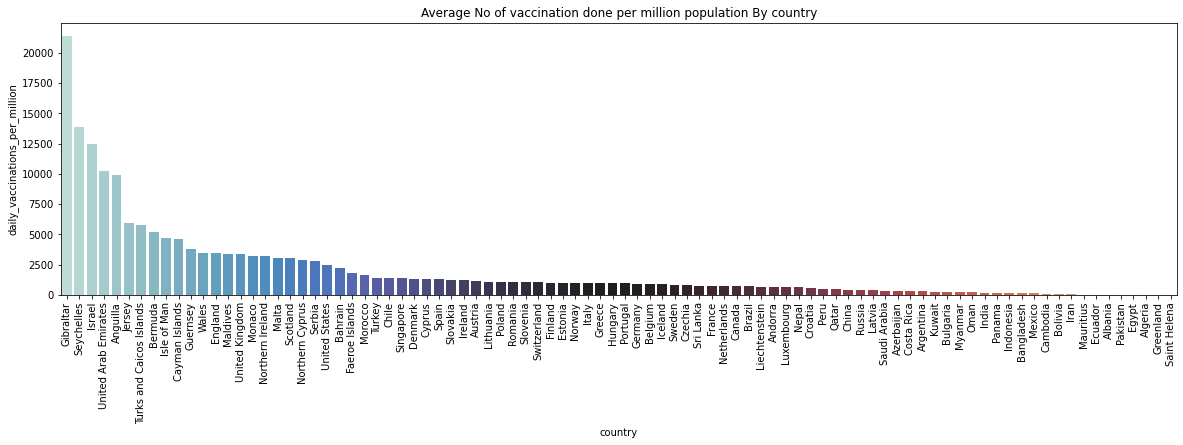

In [39]:
# now lets perform some data Analysis
mean_df=df.groupby('country').mean().sort_values(by='daily_vaccinations_per_million',ascending=False)
fig,ax=plt.subplots(figsize=(20,5))
plt.title('Average No of vaccination done per million population By country')
plt.xticks(rotation=90)
sns.barplot(x=mean_df.index,y=mean_df['daily_vaccinations_per_million'],palette='icefire')

From the above graph we can conclude:

Gibraitar,Israel,UAE,seychelles have vaccinated largest per million population.
While indonesia,India,Kuwait,Chillie have lesser vaccination per million population

<AxesSubplot:title={'center':'Total No of Vaccines manufactured By companies'}, xlabel='vaccines', ylabel='total_vaccinations'>

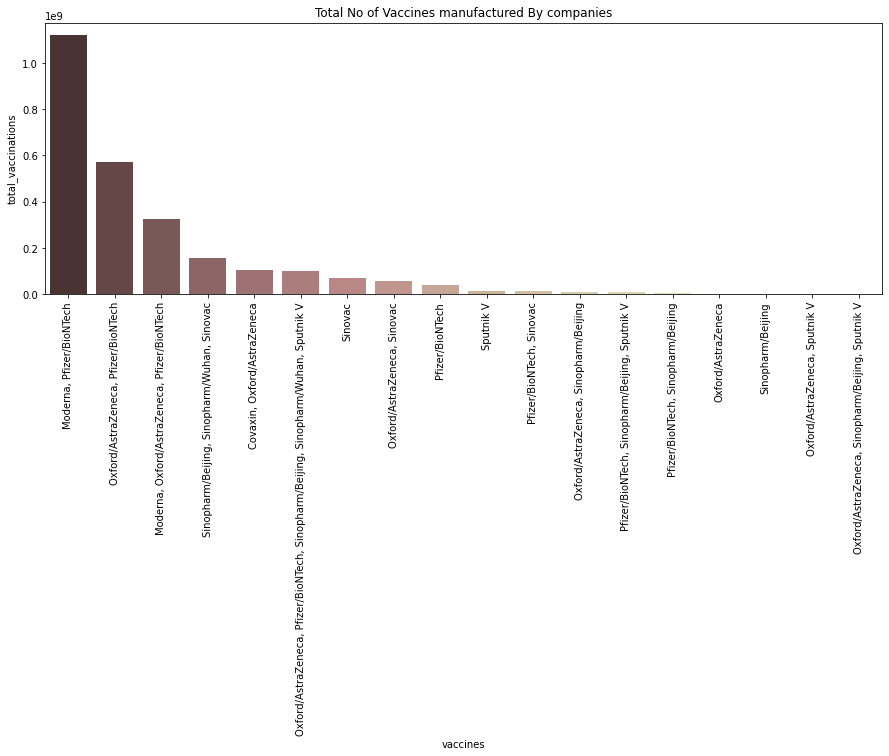

In [42]:
by_company=df.groupby('vaccines').sum().sort_values(by='total_vaccinations',ascending=False)
fig,ax=plt.subplots(figsize=(15,5))
plt.title('Total No of Vaccines manufactured By companies')
plt.xticks(rotation=90)
sns.barplot(x=by_company.index,y=by_company['total_vaccinations'],palette='pink')

In [43]:
#now we will see that how many vaccines are vaccinated each day
df['date']=pd.to_datetime(df['date'])
dt=df.groupby('date').sum()

<AxesSubplot:title={'center':'Total No of Vaccines vaccinated everyday'}, xlabel='date', ylabel='total_vaccinations'>

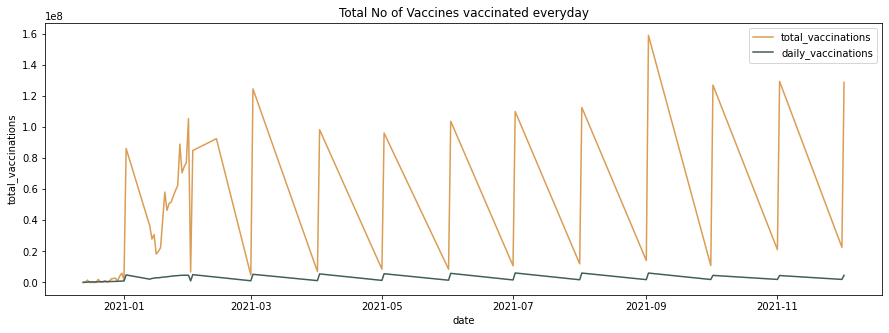

In [44]:
#lets visualize our total vaccination by day
fig,ax=plt.subplots(figsize=(15,5))
plt.title('Total No of Vaccines vaccinated everyday')
sns.lineplot(x=dt.index,y=dt['total_vaccinations'],color='#db9c53',label='total_vaccinations')
sns.lineplot(x=dt.index,y=dt['daily_vaccinations'],color='#3f5e5b',label='daily_vaccinations')

<AxesSubplot:title={'center':'Total No of Vaccines per hundreds'}, xlabel='date', ylabel='total_vaccinations_per_hundred'>

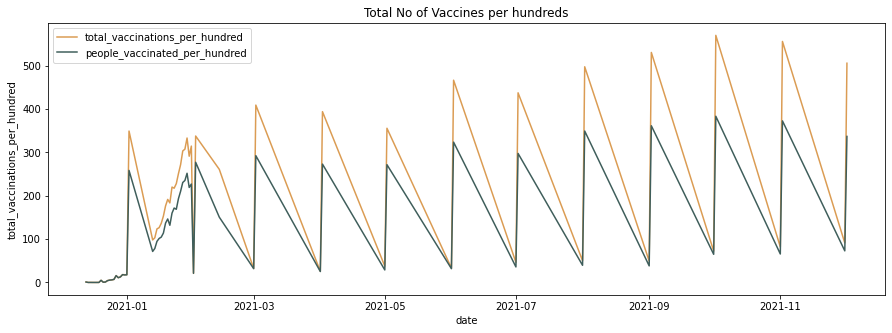

In [45]:
#lets visualize our total vaccination by per 100
fig,ax=plt.subplots(figsize=(15,5))
plt.title('Total No of Vaccines per hundreds')
sns.lineplot(x=dt.index,y=dt['total_vaccinations_per_hundred'],color='#db9c53',label='total_vaccinations_per_hundred')
sns.lineplot(x=dt.index,y=dt['people_vaccinated_per_hundred'],color='#3f5e5b',label='people_vaccinated_per_hundred')

# 7. Creating basic model

In [61]:
#now we have added one more columns that is difference of date
dt['date_diff']=dt['total_vaccinations']
count=0
for index, row in dt.iterrows():
    row['date_diff']=count
    count+=1

NOW everything is going on proper way no we will create linear regressor to predict the Total no of vaccines at any future day.



In [62]:
#creating model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
# lets create our x and Y variable
x=dt[['date_diff']]
y=dt['total_vaccinations']
model.fit(x,y)

LinearRegression()

In [63]:
print(model.coef_)
print(model.intercept_)


[1501898.61439132]
-5253416.04613094


In [64]:
#lets predict after 1 year how many vaccines will be made i.e 365 days so our x value will be 365
pr=model.predict(x)


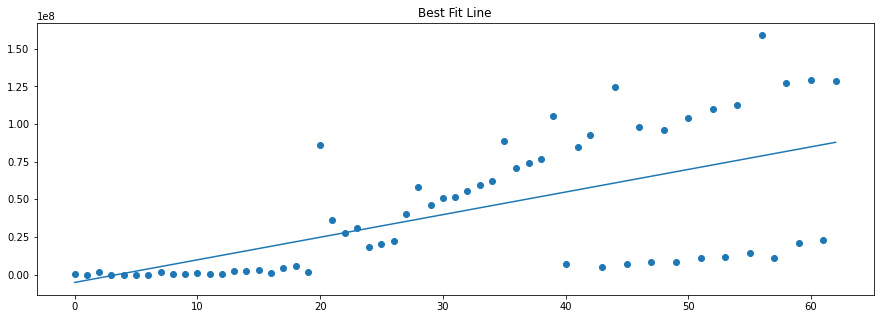

In [65]:
#lets visualize our total vaccination by day
fig,ax=plt.subplots(figsize=(15,5))
plt.title('Best Fit Line')
plt.scatter(x=dt['date_diff'],y=dt['total_vaccinations'] )
plt.plot(x,pr)

In [66]:
# lets predict for after 100 days

print(int(model.predict([[100]])))

144936445


Now we are done with this dataset and we have Gathered various useful information


# 